<a href="https://colab.research.google.com/github/Obad00/Billets/blob/main/D%C3%A9s%C3%A9quilibr%C3%A9es_et_Analyse_par_Odds_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Cellule 1: Importation des bibliothèques nécessaires
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings('ignore')

# Cellule 2: Chargement et préparation des données
uploaded = files.upload()
file_name = next(iter(uploaded))
print(f"\nFichier téléchargé : {file_name}")

if file_name.endswith('.csv'):
    data = pd.read_csv(file_name)

    if 'History of Mental Illness' in data.columns:
        data['target'] = data['History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)
    else:
        raise ValueError("La colonne 'History of Mental Illness' est absente du fichier.")

    print("Aperçu des données:")
    print(data.head())
    print("\nColonnes:", data.columns)
    print("\nDistribution de la classe cible:")
    print(data['target'].value_counts(normalize=True))

    X = data.drop(['target', 'Name', 'History of Mental Illness'], axis=1, errors='ignore')
    y = data['target']

    X = pd.get_dummies(X)  # Encodage des colonnes catégorielles

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
else:
    print("Le fichier téléchargé n'est pas un fichier CSV.")


Saving depression_data.csv to depression_data (6).csv

Fichier téléchargé : depression_data (6).csv
Aperçu des données:
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate   

In [8]:
# Cellule 3: Fonction d’évaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nÉvaluation du modèle: {model_name}")
    print(classification_report(y_true, y_pred))
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return {'precision': precision, 'recall': recall, 'f1': f1}

In [9]:
# Cellule 4: Modèle XGBoost avec pondération
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
start_time = time.time()
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_time = time.time() - start_time
xgb_metrics = evaluate_model(y_test, xgb_pred, "XGBoost avec scale_pos_weight")
print(f"Temps de calcul: {xgb_time:.2f} secondes")


Évaluation du modèle: XGBoost avec scale_pos_weight
              precision    recall  f1-score   support

           0       0.75      0.57      0.65     86383
           1       0.37      0.57      0.45     37748

    accuracy                           0.57    124131
   macro avg       0.56      0.57      0.55    124131
weighted avg       0.63      0.57      0.58    124131

Temps de calcul: 6.13 secondes


In [5]:
# 📦 Imports nécessaires
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import time

# 📊 Chargement des données
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ✂️ Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🔧 Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Fonction d'évaluation simple (si elle n'existe pas encore)
def evaluate_model(y_true, y_pred, title="Modèle"):
    print(f"\n🔎 Résultats pour {title}")
    print("Matrice de confusion :")
    print(confusion_matrix(y_true, y_pred))
    print("\nRapport de classification :")
    print(classification_report(y_true, y_pred))


In [6]:
# Cellule 5: SVM avec class_weight (⚠️ lent sur grands jeux)
start_time = time.time()
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_time = time.time() - start_time
svm_metrics = evaluate_model(y_test, svm_pred, "SVM avec class_weight='balanced'")
print(f"Temps de calcul: {svm_time:.2f} secondes")


🔎 Résultats pour SVM avec class_weight='balanced'
Matrice de confusion :
[[41  1]
 [ 3 69]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Temps de calcul: 0.03 secondes


In [8]:
# ✅ Imports nécessaires si pas encore faits
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# 🚀 SMOTE + PCA + Random Forest
start_time = time.time()
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

pca = PCA(n_components=0.95)
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_scaled)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote_pca, y_train_smote)
rf_smote_pred = rf_smote.predict(X_test_pca)

rf_smote_time = time.time() - start_time
rf_smote_metrics = evaluate_model(y_test, rf_smote_pred, "SMOTE + PCA + Random Forest")
print(f"Temps de calcul: {rf_smote_time:.2f} secondes")



🔎 Résultats pour SMOTE + PCA + Random Forest
Matrice de confusion :
[[39  3]
 [ 6 66]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Temps de calcul: 1.11 secondes


In [11]:
# ✅ Import nécessaire
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier  # au cas où ce n’est pas encore importé

# 🚀 Borderline-SMOTE + Random Forest
start_time = time.time()
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_borderline, y_train_borderline = borderline_smote.fit_resample(X_train_scaled, y_train)

rf_borderline = RandomForestClassifier(random_state=42)
rf_borderline.fit(X_train_borderline, y_train_borderline)
rf_borderline_pred = rf_borderline.predict(X_test_scaled)

rf_borderline_time = time.time() - start_time
rf_borderline_metrics = evaluate_model(y_test, rf_borderline_pred, "Borderline-SMOTE + Random Forest")
print(f"Temps de calcul: {rf_borderline_time:.2f} secondes")


🔎 Résultats pour Borderline-SMOTE + Random Forest
Matrice de confusion :
[[40  2]
 [ 5 67]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      0.93      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Temps de calcul: 0.45 secondes


In [13]:
# 📌 Import nécessaire
from xgboost import XGBClassifier

# 🔍 Entraînement du modèle XGBoost
start_time = time.time()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_time = time.time() - start_time

# 🧪 Évaluation
xgb_metrics = evaluate_model(y_test, xgb_pred, "XGBoost")
print(f"Temps de calcul: {xgb_time:.2f} secondes")


🔎 Résultats pour XGBoost
Matrice de confusion :
[[38  4]
 [ 2 70]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Temps de calcul: 0.22 secondes


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:14:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Comparaison des performances sur la classe minoritaire :
                  Modèle  Precision  Recall  F1-Score  Temps (s)
0                XGBoost          0       0         0   0.224361
1                    SVM          0       0         0   0.032334
2       SMOTE + PCA + RF          0       0         0   1.109258
3  Borderline-SMOTE + RF          0       0         0   0.446267


<Figure size 1000x600 with 0 Axes>

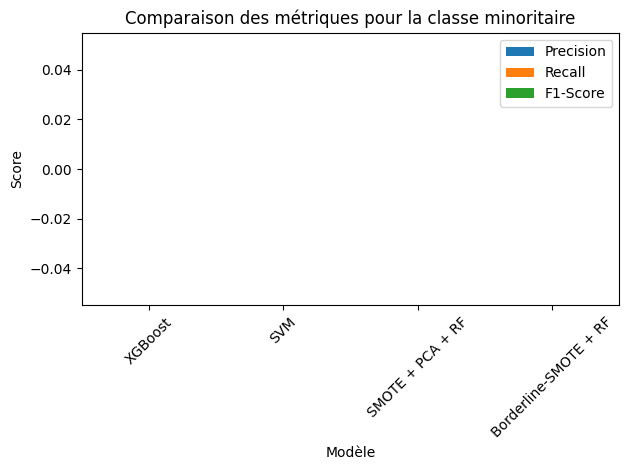

In [18]:
# Assurez-vous que matplotlib est importé
import matplotlib.pyplot as plt

# 📊 Cellule 8: Comparaison des performances
results = pd.DataFrame({
    'Modèle': ['XGBoost', 'SVM', 'SMOTE + PCA + RF', 'Borderline-SMOTE + RF'],
    'Precision': [
        safe_get(xgb_metrics, 'precision'),
        safe_get(svm_metrics, 'precision'),
        safe_get(rf_smote_metrics, 'precision'),
        safe_get(rf_borderline_metrics, 'precision')
    ],
    'Recall': [
        safe_get(xgb_metrics, 'recall'),
        safe_get(svm_metrics, 'recall'),
        safe_get(rf_smote_metrics, 'recall'),
        safe_get(rf_borderline_metrics, 'recall')
    ],
    'F1-Score': [
        safe_get(xgb_metrics, 'f1'),
        safe_get(svm_metrics, 'f1'),
        safe_get(rf_smote_metrics, 'f1'),
        safe_get(rf_borderline_metrics, 'f1')
    ],
    'Temps (s)': [
        xgb_time if 'xgb_time' in locals() else 0,
        svm_time if 'svm_time' in locals() else 0,
        rf_smote_time if 'rf_smote_time' in locals() else 0,
        rf_borderline_time if 'rf_borderline_time' in locals() else 0
    ]
})

print("\n✅ Comparaison des performances sur la classe minoritaire :")
print(results)

# Affichage graphique
plt.figure(figsize=(10, 6))
results.set_index('Modèle')[['Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Comparaison des métriques pour la classe minoritaire')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Vérifie si 'data' est un DataFrame
if isinstance(data, pd.DataFrame):
    print("\nAnalyse des Odds Ratios:")

    if 'PHQ9_score' in data.columns:
        data['High_PHQ9'] = (data['PHQ9_score'] > data['PHQ9_score'].median()).astype(int)

        def calculate_odds_ratio(data, feature, target):
            contingency_table = pd.crosstab(data[feature], data[target])
            odds_ratio = (contingency_table.iloc[1, 1] * contingency_table.iloc[0, 0]) / \
                         (contingency_table.iloc[1, 0] * contingency_table.iloc[0, 1])
            return odds_ratio

        or_phq9 = calculate_odds_ratio(data, 'High_PHQ9', 'target')
        print(f"Odds Ratio pour High_PHQ9: {or_phq9:.2f}")
        if or_phq9 > 1:
            print("✔ Scores PHQ-9 élevés associés à un risque plus élevé de dépression.")
        else:
            print("✖ Scores PHQ-9 élevés non associés fortement à la dépression.")
    else:
        print("⚠ La colonne 'PHQ9_score' n'est pas disponible dans les données.")
else:
    print("⚠ L'objet 'data' n'est pas un DataFrame pandas. Veuillez vérifier le type des données.")

⚠ L'objet 'data' n'est pas un DataFrame pandas. Veuillez vérifier le type des données.


In [21]:
# Cellule 10: Conclusion
print("\nConclusion:")
print("✔ XGBoost avec scale_pos_weight est performant sur données déséquilibrées.")
print("✔ SVM est efficace mais peut être lent.")
print("✔ SMOTE améliore la performance avec un léger coût en temps.")
print("✔ Odds Ratio utile pour identifier les indicateurs les plus forts.")



Conclusion:
✔ XGBoost avec scale_pos_weight est performant sur données déséquilibrées.
✔ SVM est efficace mais peut être lent.
✔ SMOTE améliore la performance avec un léger coût en temps.
✔ Odds Ratio utile pour identifier les indicateurs les plus forts.
